In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from numpy import argmax
import os




In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels = []

directory = '/content/drive/MyDrive/arch/spectograms1/cat_spectograms1'
i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = plt.imread(f)
    image = image[:, :, :3]
    zoom_factors = (256 / image.shape[0], 256 / image.shape[1], 1)
    image = zoom(image, zoom_factors, order=1, mode='reflect', cval=0, prefilter=True)
    if i < 250:
        train_images.append(image)
        train_labels.append([0])
    else:
        test_images.append(image)
        test_labels.append([0])
    i += 1

directory = '/content/drive/MyDrive/arch/spectograms1/dog_spectograms1'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = plt.imread(f)
    image = image[:, :, :3]
    zoom_factors = (256 / image.shape[0], 256 / image.shape[1], 1)
    image = zoom(image, zoom_factors, order=1, mode='reflect', cval=0, prefilter=True)
    if i < 530:
        train_images.append(image)
        train_labels.append([1])
    else:
        test_images.append(image)
        test_labels.append([1])
    i += 1

directory = '/content/drive/MyDrive/cow_spectograms1'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = plt.imread(f)
    image = image[:, :, :3]
    zoom_factors = (256 / image.shape[0], 256 / image.shape[1], 1)
    image = zoom(image, zoom_factors, order=1, mode='reflect', cval=0, prefilter=True)
    if i < 760:
        train_images.append(image)
        train_labels.append([2])
    else:
        test_images.append(image)
        test_labels.append([2])
    i += 1

directory = '/content/drive/MyDrive/horse_spectograms1'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = plt.imread(f)
    image = image[:, :, :3]
    zoom_factors = (256 / image.shape[0], 256 / image.shape[1], 1)
    image = zoom(image, zoom_factors, order=1, mode='reflect', cval=0, prefilter=True)
    if i < 959:
        train_images.append(image)
        train_labels.append([3])
    else:
        test_images.append(image)
        test_labels.append([3])
    i += 1

directory = '/content/drive/MyDrive/crows_spectograms1'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = plt.imread(f)
    image = image[:, :, :3]
    zoom_factors = (256 / image.shape[0], 256 / image.shape[1], 1)
    image = zoom(image, zoom_factors, order=1, mode='reflect', cval=0, prefilter=True)
    if i < 1152:
        train_images.append(image)
        train_labels.append([4])
    else:
        test_images.append(image)
        test_labels.append([4])
    i += 1

directory = '/content/drive/MyDrive/pigs_spectograms1'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = plt.imread(f)
    image = image[:, :, :3]
    zoom_factors = (256 / image.shape[0], 256 / image.shape[1], 1)
    image = zoom(image, zoom_factors, order=1, mode='reflect', cval=0, prefilter=True)
    if i < 1341:
        train_images.append(image)
        train_labels.append([5])
    else:
        test_images.append(image)
        test_labels.append([5])
    i += 1

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))




1207
1207
159
159


In [ ]:
print(train_images[0].shape)

(256, 256, 3)


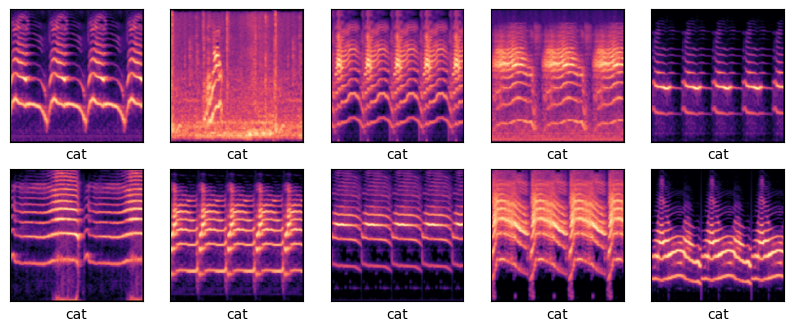

In [ ]:
class_names = ['cat', 'dog', 'cow', 'horse', 'crow', 'pig']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
38/38 [==============================] - 6s 67ms/step - loss: 1.3284 - accuracy: 0.4731
Epoch 2/20
38/38 [==============================] - 2s 64ms/step - loss: 0.6761 - accuracy: 0.7871
Epoch 3/20
38/38 [==============================] - 2s 64ms/step - loss: 0.4543 - accuracy: 0.8592
Epoch 4/20
38/38 [==============================] - 2s 65ms/step - loss: 0.3544 - accuracy: 0.8890
Epoch 5/20
38/38 [==============================] - 3s 69ms/step - loss: 0.3095 - accuracy: 0.9031
Epoch 6/20
38/38 [==============================] - 3s 67ms/step - loss: 0.2303 - accuracy: 0.9279
Epoch 7/20
38/38 [==============================] - 2s 65ms/step - loss: 0.1681 - accuracy: 0.9470
Epoch 8/20
38/38 [==============================] - 2s 65ms/step - loss: 0.1619 - accuracy: 0.9420
Epoch 9/20
38/38 [==============================] - 2s 64ms/step - loss: 0.1128 - accuracy: 0.9594
Epoch 10/20
38/38 [==============================] - 3s 66ms/step - loss: 0.1547 - accuracy: 0.9528
Epoch 11/

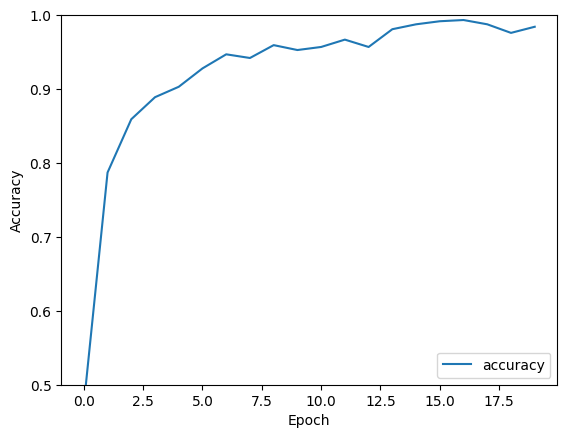

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

5/5 - 0s - loss: 0.6875 - accuracy: 0.9245 - 293ms/epoch - 59ms/step


In [ ]:
print(test_acc)

0.9245283007621765


In [ ]:
probabilities = model.predict(test_images)
predicted_classes = np.argmax(probabilities, axis=1)

5/5 [==============================] - 0s 26ms/step


In [ ]:
print(test_labels.flatten())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [ ]:
predicted_classes

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 0, 5, 5, 5, 1, 5, 4, 5, 1, 5, 1, 5, 5, 4, 5, 1, 5, 5, 1, 1,
       5, 1, 5, 5, 5])

In [ ]:
model.save('my_model_last.h5')